<a href="https://colab.research.google.com/github/Rajithaponduru/VITBML_EDA1/blob/master/NLP_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Assignment
In this assignment you will learn to do some data cleaning, prepare your features and do some K Means clustering on the data.

[Download data from here](https://drive.google.com/open?id=1ozz0zITDG8wOSQtwop2NC7AM_T3O59nj)

Load it as a pandas dataframe


In [0]:
# Your code here
import numpy as np
import pandas as pd
import csv



In [6]:
df=pd.read_csv("/content/amazon_co-ecommerce_sample.csv")
df.dropna(axis=0,inplace=True)
df

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
7,87bbb472ef9d90dcef140a551665c929,Hornby Santa's Express Train Set,Hornby,£69.93,3 new,36,7.0,4.3 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8221-Gauge-Tra...,Product Description Inject a bit of Hornby mag...,Technical Details Item Weight1.2 Kg Product Di...,Product Description Inject a bit of Hornby mag...,http://www.amazon.co.uk/Hornby-R1151-Caledonia...,Can this train go backwards as well as forward...,Beautiful set // 5.0 // 3 Dec. 2015 // By\n ...,"{""seller""=>[{""Seller_name_1""=>""Toy Arena"", ""Se..."
8,7e2aa2b4596a39ba852449718413d7cc,Hornby Gauge Western Express Digital Train Set...,Hornby,£235.58,4 new,1,1.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-Western-Master-...,Western Express Digital Train Set with eLink a...,Technical Details Item Weight2.3 Kg Product Di...,Western Express Digital Train Set with eLink a...,http://www.amazon.co.uk/Hornby-Western-Master-...,The description is incorrect. the hornby site...,Five Stars // 5.0 // 23 Dec. 2015 // By\n \...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
30,93a2c5173f17b896dc614ffbac0c2f2c,Hornby R3246TTS LNER 2-8-2 'Cock O' The North'...,Hornby,£139.95,3 new,1,1.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-Gauge-Master-Gl...,Suitable for the following scale(s): OO Scale,Technical Details Manufacturer recommended age...,Suitable for the following scale(s): OO Scale,http://www.amazon.co.uk/Hornby-Gauge-Master-Gl...,"I'm guessing this is the railroad version, as ...",Five Stars // 5.0 // 26 Nov. 2014 // By\n \...,"{""seller""=>[{""Seller_name_1""=>""Gaugemaster"", ""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9915,4f955d75276bc16b1ff27dd88c7dc686,FIFA Scene It? DVD Game,Mattel,£1.59,19 new,5,1.0,4.4 out of 5 stars,Games > DVD Games,http://www.amazon.co.uk/Toys-UEFA-Champions-Le...,Product Description Major new license game for...,Technical Details Item Weight1.1 Kg Product Di...,Product Description Major new license game for...,http://www.amazon.co.uk/The-Green-Board-Game-C...,Can I buy an up to date set of cards and DVD f...,Great game // 5.0 // 29 Jun. 2013 // By\n \...,"{""seller""=>[{""Seller_name_1""=>""Angela's Books""..."
9916,a1024a94e32b1be4ff83489152f9528d,DOMINO TILES RACKS. WOODEN. SET OF FOUR.,Elysium Enterprises,£13.99,2 new,7,1.0,4.4 out of 5 stars,Games > Domin

We are interested in customer_reviews column. However, the column is not clean data. It contains review title, rating, date, customer name, and review all in one scell separated by //

[Read this tutorial](https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/)

Extract the customer reviews in another dataframe and separate each of the components


In [7]:
df2=df["customer_reviews"].str.split("//",n=-1,expand=False)
df2

0       [Worth Buying For The Pictures Alone (As Ever)...
2       [**Highly Recommended!** ,  5.0 ,  26 May 2015...
7       [Beautiful set ,  5.0 ,  3 Dec. 2015 ,  By\n  ...
8       [Five Stars ,  5.0 ,  23 Dec. 2015 ,  By\n    ...
30      [Five Stars ,  5.0 ,  26 Nov. 2014 ,  By\n    ...
                              ...                        
9915    [Great game ,  5.0 ,  29 Jun. 2013 ,  By\n    ...
9916    [Tile/Domino Racks ,  5.0 ,  19 Jan. 2015 ,  B...
9941    [Four Stars ,  4.0 ,  8 Feb. 2016 ,  By\n    \...
9948    [Hours of Fun! ,  4.0 ,  30 Dec. 2009 ,  By\n ...
9949    [Simply the best ,  5.0 ,  14 Aug. 2011 ,  By\...
Name: customer_reviews, Length: 511, dtype: object

**Extracting columns**

In [44]:
df["reviewtitle"]=df["customer_reviews"].str.extract('(\w*\s\w*)', expand=True) 
df["rating"]=df["customer_reviews"].str.extract('(\d\.\d)', expand=True)
df["Date"] = df["customer_reviews"].str.extract('(\d\d\d\d)', expand=True)
df.drop(["customer_reviews"],axis=1)
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,reviewtitle,rating,Date,customer name
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",Worth Buying,4.0,2014,\n
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel...",Highly Recommended,5.0,2015,\n
7,87bbb472ef9d90dcef140a551665c929,Hornby Santa's Express Train Set,Hornby,£69.93,3 new,36,7.0,4.3 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8221-Gauge-Tra...,Product Description Inject a bit of Hornby mag...,Technical Details Item Weight1.2 Kg Product Di...,Product Description Inject a bit of Hornby mag...,http://www.amazon.co.uk/Hornby-R1151-Caledonia...,Can this train go backwards as well as forward...,Beautiful set // 5.0 // 3 Dec. 2015 // By\n ...,"{""seller""=>[{""Seller_name_1""=>""Toy Arena"", ""Se...",Beautiful set,5.0,2015,\n
8,7e2aa2b4596a39ba852449718413d7cc,Hornby Gauge Western Express Digital Train Set...,Hornby,£235.58,4 new,1,1.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-Western-Master-...,Western Express Digital Train Set with eLink a...,Technical Details Item Weight2.3 Kg Product Di...,Western Express Digital Train Set with eLink a...,http://www.amazon.co.uk/Hornby-Western-Master-...,The description is incorrect. the hornby site...,Five Stars // 5.0 // 23 Dec. 2015 // By\n \...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",Five Stars,5.0,2015,\n
30,93a2c5173f17b896dc614ffbac0c2f2c,Hornby R3246TTS LNER 2-8-2 'Cock O' The North'...,Hornby,£139.95,3 new,1,1.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-Gauge-Master-Gl...,Suitable for the following scale(s): OO Scale,Technical Details Manufacturer recommended age...,Suitable for the following scale(s): OO Scale,http://www.amazon.co.uk/Hornby-Gauge-Master-Gl...,"I'm guessing this is the railroad version, as ...",Five Stars // 5.0 // 26 Nov. 2014 // By\n \...,"{""seller""=>[{""Seller_name_1""=>""Gaugemaster"", ""...",Five Stars,5.0,2014,\n


In [0]:
# your code here
s=df['reviewtitle']
l=list(s)

**Tokenization**

In [0]:
import nltk
nltk.download("punkt")

In [0]:
s1=" "
s2=s1.join(l)
print(s2)

In [12]:

from nltk.tokenize import word_tokenize,sent_tokenize
sents=sent_tokenize(s2)
print(sents)

['Worth Buying Highly Recommended Beautiful set Five Stars Five Stars Great value Horny R1138 So cheap Excellent  Great train H0 Mehano and lots great star Lots of  portable Great components My happy Five Stars Endless possibilities Five Stars brilliant   but  something fantastic product Darth Vader Superb Quality Over the Thumbs up Five Stars I think Beautiful   Kenworth Great bike  The He will must have Best classic Good fun A highly  Now Four Stars Batcave review Another Missed She seems EPIC SURPRISE This is Hours of Five Stars A great looms  Fantastic value easel paper X Cut Holiday fun One of loved it What a Great toy good compact Some of Best paddling Cornelius was alpha trooper Great for Great for great  Beware the Dirty Water quality control t bother Noodle Woggle Good but brill armbands  sturdy Excellent  Does what FANTASTIC ITEM Love this good  Great but s absolutely Happy kids easy set This product Great for Five Stars Very good Good fit  recommend The children Tattoos are 

In [0]:
words=[word_tokenize(sent) for sent in sents]
print(words)

In [14]:
tokenizer = nltk.RegexpTokenizer(r"\w+")
new_words = tokenizer.tokenize(s2)
print(new_words)

['Worth', 'Buying', 'Highly', 'Recommended', 'Beautiful', 'set', 'Five', 'Stars', 'Five', 'Stars', 'Great', 'value', 'Horny', 'R1138', 'So', 'cheap', 'Excellent', 'Great', 'train', 'H0', 'Mehano', 'and', 'lots', 'great', 'star', 'Lots', 'of', 'portable', 'Great', 'components', 'My', 'happy', 'Five', 'Stars', 'Endless', 'possibilities', 'Five', 'Stars', 'brilliant', 'but', 'something', 'fantastic', 'product', 'Darth', 'Vader', 'Superb', 'Quality', 'Over', 'the', 'Thumbs', 'up', 'Five', 'Stars', 'I', 'think', 'Beautiful', 'Kenworth', 'Great', 'bike', 'The', 'He', 'will', 'must', 'have', 'Best', 'classic', 'Good', 'fun', 'A', 'highly', 'Now', 'Four', 'Stars', 'Batcave', 'review', 'Another', 'Missed', 'She', 'seems', 'EPIC', 'SURPRISE', 'This', 'is', 'Hours', 'of', 'Five', 'Stars', 'A', 'great', 'looms', 'Fantastic', 'value', 'easel', 'paper', 'X', 'Cut', 'Holiday', 'fun', 'One', 'of', 'loved', 'it', 'What', 'a', 'Great', 'toy', 'good', 'compact', 'Some', 'of', 'Best', 'paddling', 'Corneli

Remove stopwords in the nlpreview column

**Removing stopwords**

In [15]:
# your code here
from nltk.corpus import stopwords
nltk.download('stopwords')
from string import punctuation
customStopWords=set(stopwords.words('english')+list(punctuation))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
stopwords=[word for word in word_tokenize(s2) if word not in customStopWords]
print(stopwords)

['Worth', 'Buying', 'Highly', 'Recommended', 'Beautiful', 'set', 'Five', 'Stars', 'Five', 'Stars', 'Great', 'value', 'Horny', 'R1138', 'So', 'cheap', 'Excellent', 'Great', 'train', 'H0', 'Mehano', 'lots', 'great', 'star', 'Lots', 'portable', 'Great', 'components', 'My', 'happy', 'Five', 'Stars', 'Endless', 'possibilities', 'Five', 'Stars', 'brilliant', 'something', 'fantastic', 'product', 'Darth', 'Vader', 'Superb', 'Quality', 'Over', 'Thumbs', 'Five', 'Stars', 'I', 'think', 'Beautiful', 'Kenworth', 'Great', 'bike', 'The', 'He', 'must', 'Best', 'classic', 'Good', 'fun', 'A', 'highly', 'Now', 'Four', 'Stars', 'Batcave', 'review', 'Another', 'Missed', 'She', 'seems', 'EPIC', 'SURPRISE', 'This', 'Hours', 'Five', 'Stars', 'A', 'great', 'looms', 'Fantastic', 'value', 'easel', 'paper', 'X', 'Cut', 'Holiday', 'fun', 'One', 'loved', 'What', 'Great', 'toy', 'good', 'compact', 'Some', 'Best', 'paddling', 'Cornelius', 'alpha', 'trooper', 'Great', 'Great', 'great', 'Beware', 'Dirty', 'Water', 'qua

Use stemming/lemmatization. There are several options, so [read the docs](https://www.datacamp.com/community/tutorials/stemming-lemmatization-python).

**STEMMING**

In [17]:
# your code here
from nltk.stem.lancaster import LancasterStemmer
st=LancasterStemmer()
stemmedwords=[st.stem(word) for word in stopwords]
print(stemmedwords)

['wor', 'buy', 'high', 'recommend', 'beauty', 'set', 'fiv', 'star', 'fiv', 'star', 'gre', 'valu', 'horny', 'r1138', 'so', 'cheap', 'excel', 'gre', 'train', 'h0', 'mehano', 'lot', 'gre', 'star', 'lot', 'port', 'gre', 'compon', 'my', 'happy', 'fiv', 'star', 'endless', 'poss', 'fiv', 'star', 'bril', 'someth', 'fantast', 'produc', 'dar', 'vad', 'superb', 'qual', 'ov', 'thumb', 'fiv', 'star', 'i', 'think', 'beauty', 'kenwor', 'gre', 'bik', 'the', 'he', 'must', 'best', 'class', 'good', 'fun', 'a', 'high', 'now', 'four', 'star', 'batcav', 'review', 'anoth', 'miss', 'she', 'seem', 'ep', 'surpr', 'thi', 'hour', 'fiv', 'star', 'a', 'gre', 'loom', 'fantast', 'valu', 'easel', 'pap', 'x', 'cut', 'holiday', 'fun', 'on', 'lov', 'what', 'gre', 'toy', 'good', 'compact', 'som', 'best', 'paddl', 'corneli', 'alph', 'troop', 'gre', 'gre', 'gre', 'bew', 'dirty', 'wat', 'qual', 'control', 'both', 'noodl', 'woggl', 'good', 'bril', 'armband', 'sturdy', 'excel', 'doe', 'fantast', 'item', 'lov', 'good', 'gre', '

**LEMMATIZATION**

In [0]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [19]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def get_lemma(words):
  wordnet_lemmatizer=WordNetLemmatizer()
  l=[]
  for word in words:
    l.append(wordnet_lemmatizer.lemmatize(word))
  print(l)
get_lemma(stopwords)





[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
['Worth', 'Buying', 'Highly', 'Recommended', 'Beautiful', 'set', 'Five', 'Stars', 'Five', 'Stars', 'Great', 'value', 'Horny', 'R1138', 'So', 'cheap', 'Excellent', 'Great', 'train', 'H0', 'Mehano', 'lot', 'great', 'star', 'Lots', 'portable', 'Great', 'component', 'My', 'happy', 'Five', 'Stars', 'Endless', 'possibility', 'Five', 'Stars', 'brilliant', 'something', 'fantastic', 'product', 'Darth', 'Vader', 'Superb', 'Quality', 'Over', 'Thumbs', 'Five', 'Stars', 'I', 'think', 'Beautiful', 'Kenworth', 'Great', 'bike', 'The', 'He', 'must', 'Best', 'classic', 'Good', 'fun', 'A', 'highly', 'Now', 'Four', 'Stars', 'Batcave', 'review', 'Another', 'Missed', 'She', 'seems', 'EPIC', 'SURPRISE', 'This', 'Hours', 'Five', 'Stars', 'A', 'great', 'loom', 'Fantastic', 'value', 'easel', 'paper', 'X', 'Cut', 'Holiday', 'fun', 'One', 'loved', 'What', 'Great', 'toy', 'good', 'compact', 'Some', 'Best', 'p

Find the first 100 most important words, i.e. most frequently used words and plot them using FreqDist plot in nltk. See the sample colab file given during class. Note your observations.

In [0]:
# your code here
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

def plot_freq_dist(words,num_words=30):
  fdist=FreqDist(stopwords)
  fdist.plot(num_words,cumulative=False)


**FREQUENCY DISTRIBUTION PLOT**

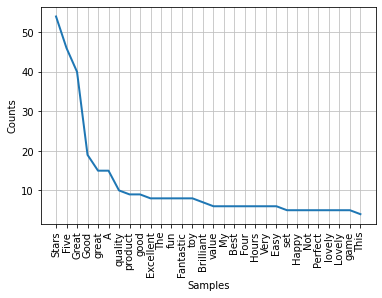

In [0]:
plot_freq_dist(words[0],num_words=30)

Create another column called TFIDF and use the nlpreview to construct tfidf in this newly created column

In [0]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

def get_bag_of_words(sentences):
    vectorizer = CountVectorizer()
    print(vectorizer.fit_transform(sentences).todense())
    print(vectorizer.vocabulary_) 
    print(vectorizer.get_feature_names())

In [0]:
# your code here
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
input=[input]
X=vectorizer.fit_transform(s)

In [0]:
count_vec = CountVectorizer(stop_words="english", analyzer='word')
count_train = count_vec.fit(s)
bag_of_words = count_vec.transform(s)

In [30]:
vectorizer.fit_transform(s)

<511x326 sparse matrix of type '<class 'numpy.float64'>'
	with 664 stored elements in Compressed Sparse Row format>

Find the top 100 words with maximum TF IDF score and plot it. Note your observations and see how different it is from the Top 100 highest frequency words.

Use KMeans clustering to apply clustering to this TFIDF column. Find optimal number of clusters using elbow plot and note your observations for the optimal clusters.

In [0]:
from sklearn .cluster import KMeans
k=KMeans(n_clusters=3,init='k-means++',max_iter=100,n_init=1,verbose=True)

In [0]:
# Your code here
k.fit(s)

# visualize your clusters
 Let us use word cloud visualization.

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
def plotwordcloud(words):
  wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words) 
  plt.figure(figsize=(10, 7)) 
  plt.imshow(wordcloud, interpolation="bilinear") 
  plt.axis('off') 
  plt.show()

In [0]:
# your code here to call plotwordcloud for concatenated word set of each cluster. You need to find all words of a cluster and create a set.

You can analyze the outcomes. See what threshold you want to pick!